## Data loading

### Subtask:
Load the "bbc-text.csv" file into a pandas DataFrame.


**Reasoning**:
Load the data and perform basic inspection.



In [ ]:
import pandas as pd

try:
    df = pd.read_csv("bbc-text.csv", encoding="ISO-8859-1")  
    display(df.head())
    print(df.shape)
    print(df.dtypes)
    
    if not all(col in df.columns for col in ['text', 'category']):
        raise ValueError("Required columns 'text' and 'category' not found.")
except FileNotFoundError:
    print("Error: 'bbc-text.csv' not found.")
except pd.errors.ParserError:
    print("Error: Could not parse 'bbc-text.csv'. Check the file format.")
except UnicodeDecodeError:
    print("Error: Encoding issue. Try opening the file with a different encoding.")
except ValueError as e:
    print(e)
except Exception as e:
    print(f"An unexpected error occurred: {e}")


,category,text
0,tech,tv future in the hands of viewers with home th...
1,business,worldcom boss left books alone former worldc...
2,sport,tigers wary of farrell gamble leicester say ...
3,entertainment,last star wars not for children the sixth an...
4,politics,howard hits back at mongrel jibe michael howar...


(2226, 2)
category    object
text        object
dtype: object


## Data exploration

### Subtask:
Explore the dataset to understand its structure, including the distribution of categories and the length of news articles. Check for missing values and duplicates.


**Reasoning**:
Analyze the distribution of categories, the length of news articles, check for missing values and duplicates, and then visualize the distributions.



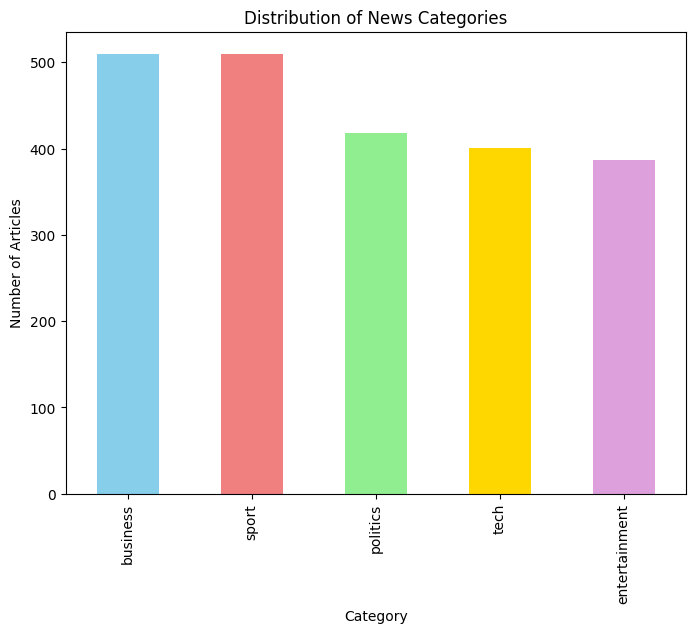

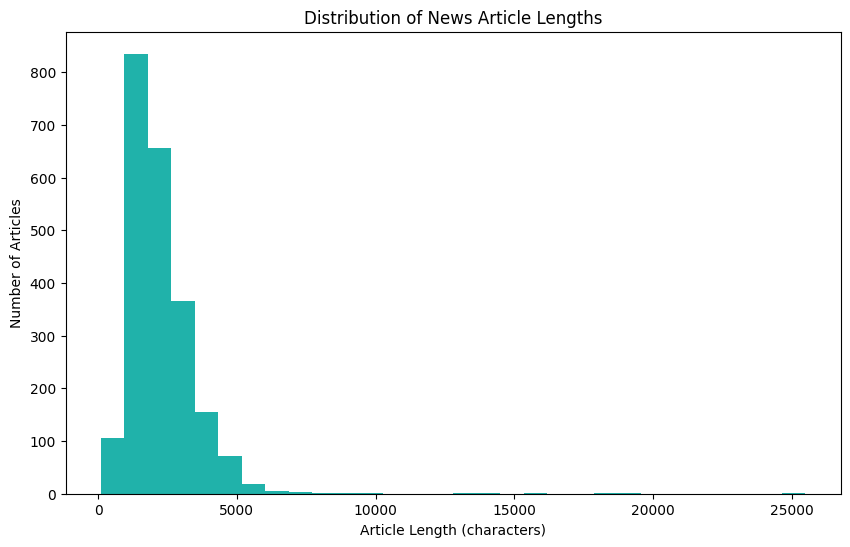

Missing Values:
 category       0
text           0
text_length    0
dtype: int64

Number of duplicate rows: 99


,category,text,text_length
5,politics,howard hits back at mongrel jibe michael howar...,3534
85,politics,hague given up his pm ambition former conser...,1567
301,politics,fox attacks blair s tory lies tony blair lie...,2988
496,tech,microsoft gets the blogging bug software giant...,1380
543,business,economy strong in election year uk businesse...,1708
...,...,...,...
2206,politics,kennedy questions trust of blair lib dem leade...,1917
2207,tech,california sets fines for spyware the makers o...,1846
2213,tech,progress on new internet domains by early 2005...,1986
2215,tech,junk e-mails on relentless rise spam traffic i...,1530



Summary:
Number of missing values: 0
Number of duplicate rows: 99
Class Distribution:
 category
business         510
sport            510
politics         418
tech             401
entertainment    387
Name: count, dtype: int64

Text Length Distribution (Statistics):
 count     2226.000000
mean      2262.566038
std       1365.693263
min         98.000000
25%       1445.000000
50%       1964.500000
75%       2802.000000
max      25483.000000
Name: text_length, dtype: float64


In [3]:
import matplotlib.pyplot as plt
import pandas as pd
# Analyze category distribution
df = pd.read_csv("C:\\Users\\karth\\OneDrive\\Desktop\\bbc-text.csv", encoding="ISO-8859-1") 
category_counts = df['category'].value_counts()
plt.figure(figsize=(8, 6))
category_counts.plot(kind='bar', color=['skyblue', 'lightcoral', 'lightgreen', 'gold', 'plum'])
plt.title('Distribution of News Categories')
plt.xlabel('Category')
plt.ylabel('Number of Articles')
plt.show()

# Analyze text length distribution
df['text_length'] = df['text'].apply(len)
plt.figure(figsize=(10, 6))
plt.hist(df['text_length'], bins=30, color='lightseagreen')
plt.title('Distribution of News Article Lengths')
plt.xlabel('Article Length (characters)')
plt.ylabel('Number of Articles')
plt.show()


# Check for missing values
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)

# Check for duplicates
duplicate_rows = df[df.duplicated()]
print("\nNumber of duplicate rows:", len(duplicate_rows))
display(duplicate_rows)

# Summarize findings
print("\nSummary:")
print("Number of missing values:", missing_values.sum())
print("Number of duplicate rows:", len(duplicate_rows))
print("Class Distribution:\n", category_counts)
print("\nText Length Distribution (Statistics):\n", df['text_length'].describe())

## Data preparation

### Subtask:
Clean and preprocess the text data in the 'text' column of the DataFrame `df`.  Remove duplicate rows.


**Reasoning**:
Remove duplicate rows, convert text to lowercase, remove punctuation, remove stop words, and apply lemmatization.



In [ ]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

nltk.download('stopwords', quiet=True)
nltk.download('wordnet', quiet=True)

# Remove duplicate rows
df.drop_duplicates(inplace=True)

# Lowercasing
df['text'] = df['text'].str.lower()

# Punctuation Removal
df['text'] = df['text'].apply(lambda x: re.sub(r'[^\w\s]', '', x))

# Stop Word Removal
stop_words = set(stopwords.words('english'))
df['text'] = df['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))

# Lemmatization
lemmatizer = WordNetLemmatizer()
df['text'] = df['text'].apply(lambda x: ' '.join([lemmatizer.lemmatize(word) for word in x.split()]))

display(df.head())

,category,text,text_length
0,tech,tv future hand viewer home theatre system plas...,4333
1,business,worldcom bos left book alone former worldcom b...,1843
2,sport,tiger wary farrell gamble leicester say rushed...,1342
3,entertainment,last star war child sixth final star war movie...,1248
4,politics,howard hit back mongrel jibe michael howard sa...,3534


## Feature engineering

### Subtask:
Create a document-term matrix using TF-IDF vectorization.


**Reasoning**:
Create a document-term matrix using TF-IDF vectorization.



In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Create a TfidfVectorizer object
vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')

# Fit and transform the text data
X = vectorizer.fit_transform(df['text'])

# Print some info about the matrix
print(X.shape)
print(type(X))

(2127, 5000)
<class 'scipy.sparse._csr.csr_matrix'>


## Data splitting

### Subtask:
Split the data into training and testing sets.


**Reasoning**:
Split the data into training and testing sets using train_test_split.



In [ ]:
from sklearn.model_selection import train_test_split

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, df['category'], test_size=0.2, random_state=42, stratify=df['category'])

# Print the shapes of the resulting sets to verify the split
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (1701, 5000)
X_test shape: (426, 5000)
y_train shape: (1701,)
y_test shape: (426,)


## Model training

### Subtask:
Train a Multinomial Naive Bayes classifier on the training data (`X_train`, `y_train`)


**Reasoning**:
Train a Multinomial Naive Bayes classifier using the training data.



In [ ]:
from sklearn.naive_bayes import MultinomialNB

# Create and train the Multinomial Naive Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

MultinomialNB()

## Model evaluation

### Subtask:
Evaluate the performance of the trained Multinomial Naive Bayes classifier (`nb_classifier`) on the test data (`X_test`, `y_test`)


**Reasoning**:
Evaluate the performance of the trained Multinomial Naive Bayes classifier using the test data and generate a confusion matrix.



Accuracy: 0.9695
Precision: 0.9702
Recall: 0.9695
F1-score: 0.9694
Macro-averaged F1-score: 0.9678
               precision    recall  f1-score   support

     business       0.93      0.99      0.96       101
entertainment       0.99      0.95      0.97        74
     politics       0.96      0.98      0.97        81
        sport       0.99      1.00      1.00       101
         tech       0.98      0.91      0.95        69

     accuracy                           0.97       426
    macro avg       0.97      0.96      0.97       426
 weighted avg       0.97      0.97      0.97       426



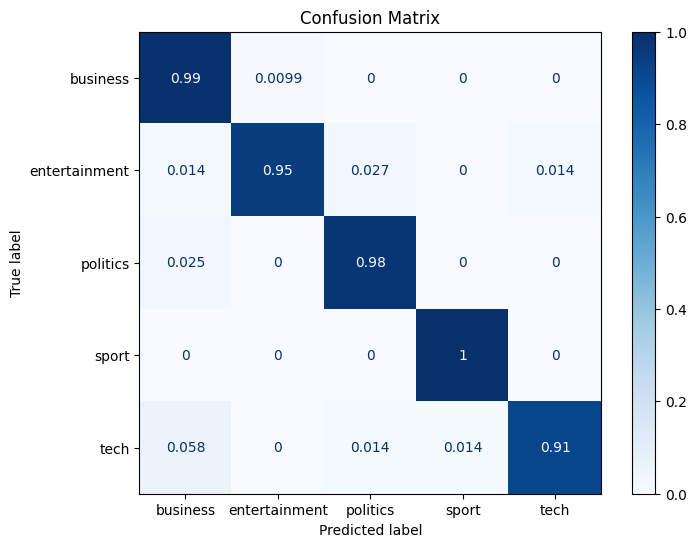

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Predict on the test set
y_pred = nb_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
macro_f1 = f1_score(y_test, y_pred, average='macro')

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")
print(f"Macro-averaged F1-score: {macro_f1:.4f}")
print(classification_report(y_test, y_pred))

# Plot confusion matrix
fig, ax = plt.subplots(figsize=(8, 6))
ConfusionMatrixDisplay.from_estimator(nb_classifier, X_test, y_test, ax=ax, cmap='Blues', normalize='true')
plt.title('Confusion Matrix')
plt.show()

In [ ]:

import pandas as pd

# Correcting the DataFrame creation
new_data = pd.DataFrame({
    'text': [
        "A 10-person company to handle INR3,000 crore contract? Hyundai’s RPTs raise eyebrows.",
        "Champions Trophy: Rahul excels in new role at No. 6, says ‘It required lot of preparation’"
    ]
})

print(new_data)


                                                text
0  A 10-person company to handle INR3,000 crore c...
1  Champions Trophy: Rahul excels in new role at ...


In [ ]:
# Preprocess the new data using the same steps as before
new_data['text'] = new_data['text'].str.lower()
new_data['text'] = new_data['text'].apply(lambda x: re.sub(r'[^\w\s]', '', x))
new_data['text'] = new_data['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))
new_data['text'] = new_data['text'].apply(lambda x: ' '.join([lemmatizer.lemmatize(word) for word in x.split()]))

In [ ]:
# Transform the new data using the fitted vectorizer
X_new = vectorizer.transform(new_data['text'])

In [ ]:
# Predict the categories of the new data
new_predictions = nb_classifier.predict(X_new)
print(new_predictions)

['business' 'sport']
